# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [23]:
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #library for plots and visualizations
#import seaborn as sns #library for visualizations
import scipy.stats as stats
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [24]:
medical.shape

(1338, 8)

In [25]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ Looking at the histogram, the distribution does not appear to be a normal distribution. A majority of the medical charges seem to be within the \\$0 to \\$15,000 range. It seems we do have a few potential outliers at \\$60,000 as the data has a right skewed tail. Because the data is heavily right skewed, it makes more sense to use a median as it would not be as heavily affected by outliers. The standard deviation is not appropriate when the data has outliers or is heavily skewed.

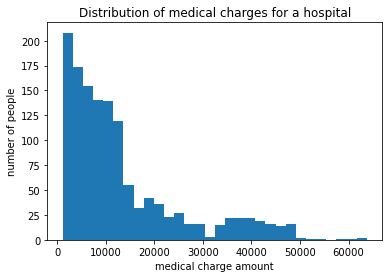

In [26]:
_ = plt.hist(medical['charges'], bins=30)
_ = plt.xlabel('medical charge amount')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of medical charges for a hospital')

In [27]:
hospital_charges_mean = np.mean(medical['charges'])
print('Mean medical charge amount is:', hospital_charges_mean)
#we don't use ddof =1 for np.std here, since the sample is not the entire population
#hospital_charges_std_pop = np.std(medical['charges'], ddof=1)
#print('Population Standard deviation medical charge is:', hospital_charges_std_pop)
hospital_charges_std = np.std(medical['charges'])
print('Sample Standard deviation medical charge is:', hospital_charges_std)

Mean medical charge amount is: 13270.422265141257
Sample Standard deviation medical charge is: 12105.484975561605


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ This frequentist test most appropriate for this situation would be using the margin of error and confidence interval since we dont know the true population mean. We would do a one mean hypothesis test, where we compare the medical charge data's true population mean to being a less than single number \\$12,000. In this scenario, a permutation test is not appropriate as we only have one set of data (medical charges). We would take the mean as our test statistic, and use the resampling technique bootstrapping to generate an array of average medical charges. With knowledge about the Central Limit Theoream, despite knowing tha the sample's distribution is non-normal (it's actually right tailed/skewed); the distribution of the sampling mean will be a normal distribution with a sample size larger than 30. Once the bootstrapped data is generated, we can calculate the sample mean. Based on our confidence interval, and knowing that we framed out null hypothesis, we want a z-score, or critical value, that is one tailed. We are unaware at this time of the sample's true population standard deviation so we can calculate the margin of error using the formul: Margin of error = (critical value) * (standard error), where standard error is the standard deviation of the sample divided by the square root of the sample size.With this we can generate our confidence interval to figure out whether our null is rejected or not-rejected.  


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The appropriate confidence interval in this case would be 95% and one-sided, due to how we framed our null-hypothesis: the true population mean for medical charges is greater than or equal to \\$12,000. 

From the calculated p-value that the bootstrap replicate of the medical charges being less than \\$12,000 is 0.0001, it's statistically significant that the null hypothesis false. The administrator should not be concerned. The 95% confidence interval for the mean medical charge is \\$13265 to \\$13269. 

In [28]:
med_charges = medical['charges']

In [29]:
def bootstrap_replicate_1d(data, func):
    "Generate bootstrap replicate of 1D data."
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

#this function generates 1 boot strap replicate

In [30]:
def draw_bs_reps(data, func, size=1):
    "Draw boostrap replicates."
    
    #initialize array of replicates
    bs_replicates = np.empty(size)
    
    #Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    
    return bs_replicates

#this function generates bootstrap replicate array which can be plotted via histogram
#to show the Probability Density Function
    
    

In [31]:
seed(42)
#array with 1000 values, where each value is the mean from a resampling of the 
#medical charges with bootstrapping as the method
bs_replicates = draw_bs_reps(medical['charges'], np.mean, 10000)

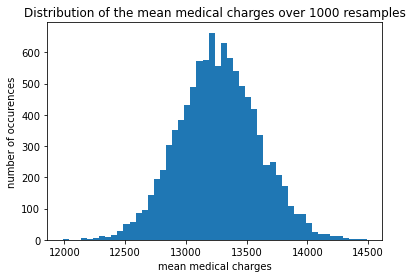

In [32]:
#plotting the distribution of the bootstrap replicates of the medical
#charges.
_ = plt.hist(bs_replicates, bins=50)
_ = plt.xlabel('mean medical charges')
_ = plt.ylabel('number of occurences')
_ = plt.title('Distribution of the mean medical charges over 1000 resamples')

In [33]:
#calculating the sample standard deviation of the sample replicates: mean of
#medical charges
bs_replicates_stdev = np.std(bs_replicates, ddof=1)
print('Estimated sample standard deviation of the mean medical charges is:', bs_replicates_stdev)

Estimated sample standard deviation of the mean medical charges is: 330.12331276468353


In [34]:
#calculating the margin of error
margin_of_error = norm.ppf(0.95)*(bs_replicates_stdev)/(np.sqrt(len(bs_replicates)))
print('Margin of error: +/-', margin_of_error)

Margin of error: +/- 5.430045283422249


In [35]:
#calculating the 95% confidence interval
conf_interval_bottom = np.mean(bs_replicates) - margin_of_error
conf_interval_top = np.mean(bs_replicates) + margin_of_error
print('95% Confidence interval of the mean:', conf_interval_bottom, ',', conf_interval_top)

95% Confidence interval of the mean: 13262.18098947887 , 13273.041080045712


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 

Null Hypothesis: H0 = mean charge of insured = mean charge of non-insured

Alternative hypohesis: H1 = mean charge of insured =! mean charge of non-insured

We are making the assumption that both groups have an equal population variance.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__  
It's verified that we get essentially the same results from the manual and scipy.stats.t function to calculate the t value and the p-value. In both cases, we get a t-value that is ~11.89 and a p-value that is 4e-31, or approximately 0. With such a small p-value, the null hypothesis is rejected as the probability of the null occuring is less than 0.05 or even 0.01. The alternative hypothesis is most likely true indicating that mean charge of the insured group is not the same as those not-insured.

In [36]:
#using series "insured" to subet medical df for all data, where insuranceclaim == True == 1
#patients_insured = medical[insured == True]
#same as above, but now specified particular column of interest, "charges"
patients_insured = medical[medical["insuranceclaim"] == True]['charges']
print(patients_insured)

0       16884.92400
1        1725.55230
4        3866.85520
6        8240.58960
10       2721.32080
           ...     
1330    12629.16560
1331    10795.93733
1334     2205.98080
1335     1629.83350
1337    29141.36030
Name: charges, Length: 783, dtype: float64


In [37]:
patients_uninsured = medical[medical["insuranceclaim"] == False]['charges']
print(patients_uninsured)

2        4449.46200
3       21984.47061
5        3756.62160
7        7281.50560
8        6406.41070
           ...     
1324     4239.89265
1328    22395.74424
1332    11411.68500
1333    10600.54830
1336     2007.94500
Name: charges, Length: 555, dtype: float64


In [38]:
#defining n0 as insured patients number of observations
n0 = len(patients_insured)
print("insured sample count (n0):", n0)

insured sample count (n0): 783


In [39]:
#defining n1 as uninsured patients number of observations
n1 = len(patients_uninsured)
print("uninsured sample count (n1):", n1)

uninsured sample count (n1): 555


In [40]:
#defining x0 as insured patients mean sample charge
x0 = np.mean(patients_insured)
print("insured sample mean (x0):", x0)

insured sample mean (x0): 16423.928276537663


In [41]:
#defining x1 as uninsured patients mean sample charge
x1 = np.mean(patients_uninsured)
print("uninsured sample mean (x1):", x1)

uninsured sample mean (x1): 8821.421892306294


In [42]:
#defining s0 as insured patients standard deviation of charges
s0 = np.std(patients_insured, ddof = 1)
print("insured patient charges std:", s0)

insured patient charges std: 14045.928418802127


In [43]:
#defining s1 as uninsured patients standard deviation of charges
s1 = np.std(patients_uninsured, ddof = 1)
print("uninsured patient charges std:", s1)

uninsured patient charges std: 6446.510126811736


In [44]:
#checking variances for insured and uninsured patient charges
#var0 is insured patient charges variance
var0 = np.var(patients_insured)
print(var0)

197036140.77172482


In [45]:
#var2 is uninsured patient charges variance
var1 = np.var(patients_uninsured)
print(var1)

41482614.44965368


In [46]:
print(var0/var1)

4.749848662765994


In [48]:
#defining sp as pooled standard deviation of both insured and uninsured patient charges
sp = np.sqrt(((n0-1)*var0 + (n1-1)*var1)/(n0 + n1 - 2))
print("pooled standard deviation of insured and uninsured patient charges charges:", sp)

pooled standard deviation of insured and uninsured patient charges charges: 11512.282899205744


In [49]:
#define t_stat_manual as test statistic for two means
t_stat_manual = (x0 - x1)/(sp*(np.sqrt((1/n0) + (1/n1))))
print("t_stat_manual:", t_stat_manual)

t_stat_manual: 11.901306943555385


In [50]:
#define p_value_manual as p-value from manual calculation of test statistic
#in this case the alternative hypothesis is for a not-equal type problem
#this not equal type problem means that it's a 2 tailed test, and not one
#so the p-value generated from this is the area of just one side, so we
#need to double it, in order to get the correct p-value ~4e-31

p_value_manual = t.sf(t_stat_manual, n0 + n1 - 2)
print("p_value_manual from t_stat_manual:", 2*p_value_manual)

p_value_manual from t_stat_manual: 2.0452751071868976e-31


In [51]:
#define t_stat as test statistic calculation using scipy stat's library method 
t_stat = stats.ttest_ind(patients_insured, patients_uninsured, equal_var = True)
print(t_stat)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ The comparable version of the t-test sample for a normal distribution using the z-test would be to use: norm.sf(x, loc=0, scale = 1), where we'd adjust the location for the population mean and the scale for the population standard deviation.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test